In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
            path_XYs.append(XYs)
    return path_XYs

In [3]:
def plot(paths_XYs):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
    ax.set_aspect('equal')
    plt.show()

In [4]:
def plot_shape(csv_path):
    csv_curve = read_csv(csv_path)
    plot(csv_curve)
    print("Number of curves:", len(csv_curve))

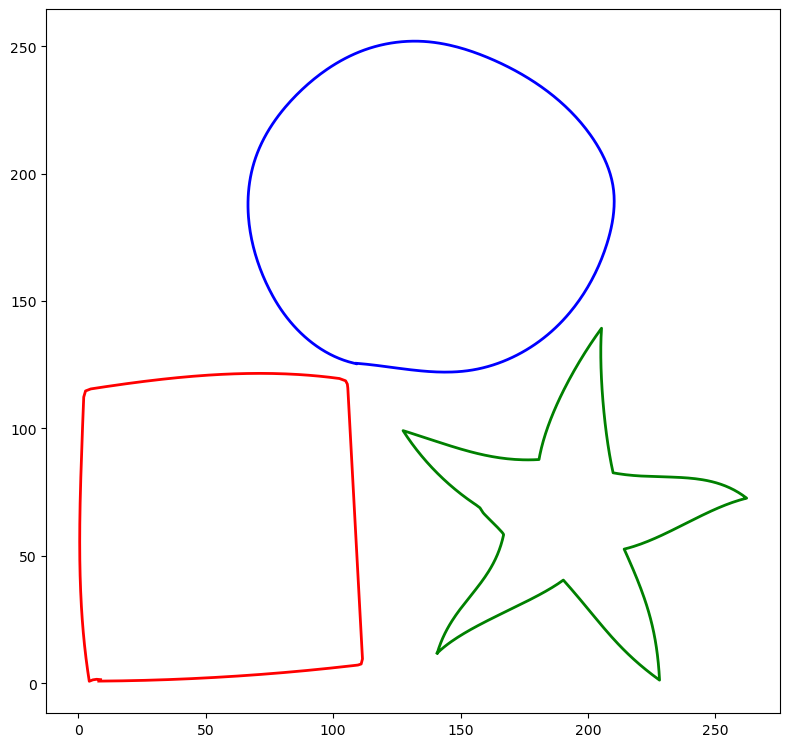

Number of curves: 3


In [5]:
isolation_path = r"C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\problems\problems\isolated.csv"
plot_shape(isolation_path)

In [8]:
isolation_polylines = read_csv(isolation_path)
print(len(isolation_polylines))

3


In [11]:
polyline = isolation_polylines[0][0]

### Fitting Bezier curves on Polylines

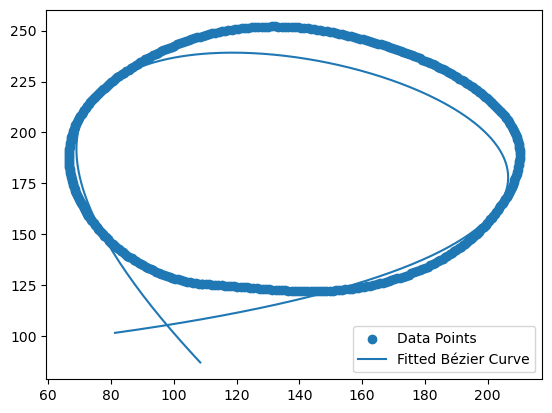

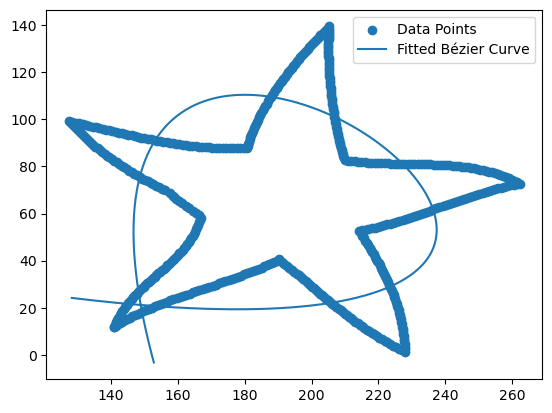

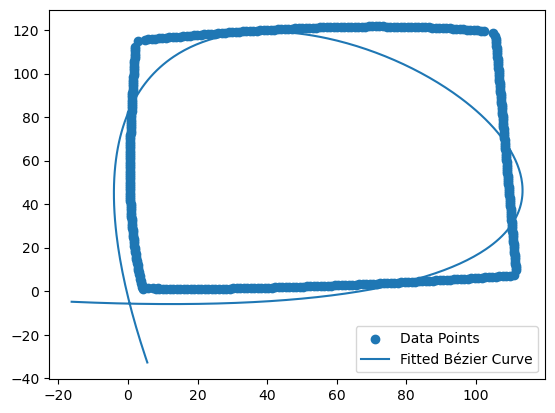

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Function to read CSV and parse paths
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

# Define the cubic Bézier curve
def bezier_curve(t, P0, P1, P2, P3):
    t = t[:, np.newaxis]  # Reshape t to (n, 1) for broadcasting
    return (1-t)**3 * P0 + 3*(1-t)**2 * t * P1 + 3*(1-t)*t**2 * P2 + t**3 * P3

# Function to minimize
def objective(params, t, data):
    P0, P1, P2, P3 = params[:2], params[2:4], params[4:6], params[6:8]
    curve_points = bezier_curve(t, P0, P1, P2, P3)
    return np.sum((curve_points - data)**2)

# Load CSV data
csv_path = r"C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\problems\problems\isolated.csv"
path_XYs = read_csv(csv_path)

# Fit a cubic Bézier curve to each polyline
for path in path_XYs:
    for data in path:
        if data.shape[0] < 4:
            continue  # Skip if there are fewer than 4 points
        
        # Initial guess for control points
        init_params = np.array([data[0, 0], data[0, 1],
                                data[1, 0], data[1, 1],
                                data[2, 0], data[2, 1],
                                data[3, 0], data[3, 1]])

        # Parameter t values
        t = np.linspace(0, 1, data.shape[0])

        # Minimize the objective function
        result = minimize(objective, init_params, args=(t, data))

        # Extract the optimized control points
        P0, P1, P2, P3 = result.x[:2], result.x[2:4], result.x[4:6], result.x[6:8]

        # Generate the fitted Bézier curve
        fitted_curve = bezier_curve(t, P0, P1, P2, P3)

        # Plot the data points and the fitted curve
        plt.scatter(data[:, 0], data[:, 1], label='Data Points')
        plt.plot(fitted_curve[:, 0], fitted_curve[:, 1], label='Fitted Bézier Curve')
        plt.legend()
        plt.show()


### Linear regression for Lines

Line points have been saved to C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\line2.csv


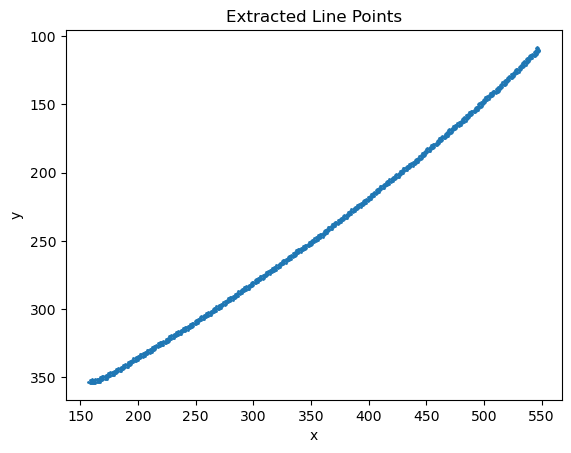

In [40]:
import cv2
import numpy as np
import csv
import matplotlib.pyplot as plt

def extract_line_points(image_path, csv_path='line_points.csv'):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Check if image is loaded successfully
    if image is None:
        raise ValueError(f"Image not found at {image_path}")
    
    # Threshold the image to get a binary image
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)
    
    # Find the coordinates of the white pixels (the line)
    coordinates = np.column_stack(np.where(binary_image > 0))
    
    # Save the coordinates to a CSV file
    line_no = 0
    segment_no = 0
    with open(csv_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        for coord in coordinates:
            writer.writerow([line_no, segment_no, coord[1], coord[0]])  # Adjust order to line no., segment no., x, y
    
    print(f"Line points have been saved to {csv_path}")
    
    return coordinates

# Example usage
image_path = r"C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\line1.png"
csv_path = r"C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\line2.csv"  # Change this to your desired CSV output path
line_points = extract_line_points(image_path, csv_path)

# Visualize the points
plt.scatter(line_points[:, 1], line_points[:, 0], s=1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Extracted Line Points')
plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
plt.show()

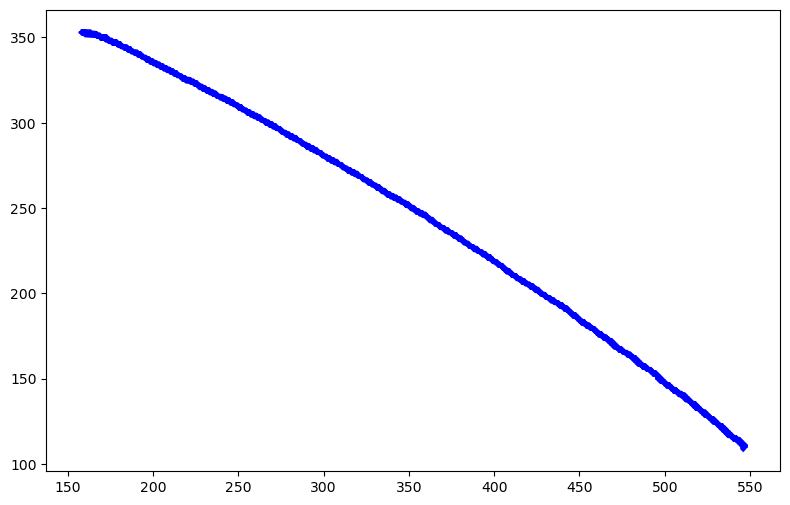

Number of curves: 1


In [41]:
line2_path = r"C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\line2.csv"
plot_shape(line2_path)

In [43]:
line2 = read_csv(line2_path)[0][0]
print(line2)

[[546. 108.]
 [545. 109.]
 [546. 109.]
 ...
 [161. 354.]
 [162. 354.]
 [163. 354.]]


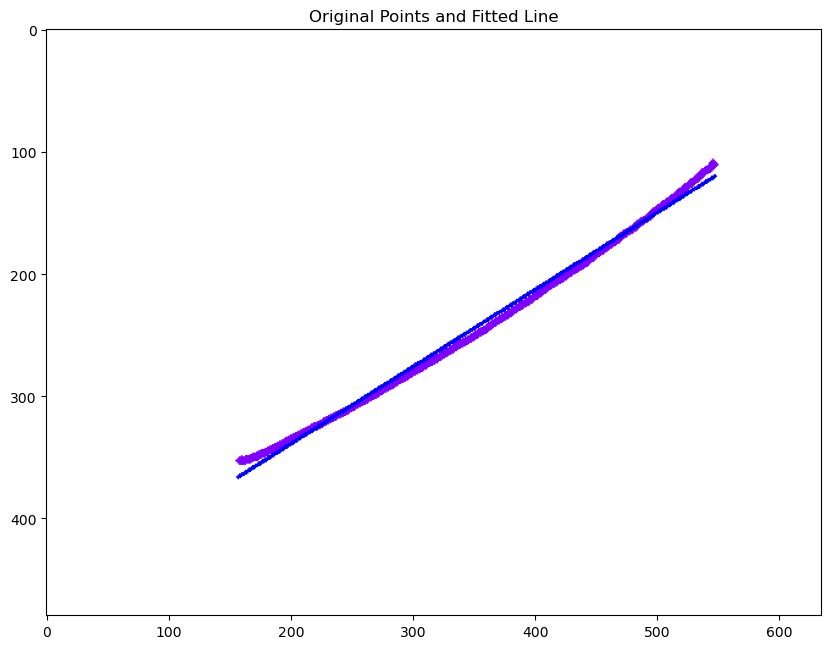

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def fit_and_plot_line(image_path, points):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    
    # Check if image is loaded successfully
    if image is None:
        raise ValueError(f"Image not found at {image_path}")
    
    # Convert the list of points to a numpy array
    points = np.array(points)
    
    # Separate the points into x and y coordinates
    x = points[:, 0].reshape(-1, 1)
    y = points[:, 1]
    
    # Fit a line using linear regression
    model = LinearRegression()
    model.fit(x, y)
    m = model.coef_[0]
    c = model.intercept_
    
    # Generate fitted line points
    x_fit = np.linspace(x.min(), x.max(), 1000)
    y_fit = m * x_fit + c
    
    # Create a copy of the image to draw the lines
    line_image = image.copy()
    
    # Draw the original points
    for point in points:
        cv2.circle(line_image, (int(point[0]), int(point[1])), 2, (255, 0, 128), -1)
    
    # Draw the fitted line
    for i in range(len(x_fit) - 1):
        pt1 = (int(x_fit[i]), int(y_fit[i]))
        pt2 = (int(x_fit[i+1]), int(y_fit[i+1]))
        cv2.line(line_image, pt1, pt2, (255, 0, 0), 2)
    
    # Convert BGR image to RGB for displaying with matplotlib
    line_image_rgb = cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB)
    
    # Display the original and fitted lines
    plt.figure(figsize=(10, 10))
    plt.imshow(line_image_rgb)
    plt.title('Original Points and Fitted Line')
    plt.show()

# Example usage
image_path = r"C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\line1.png"
fit_and_plot_line(image_path, line2)

#### Regression for Circles

In [49]:
def get_circle(circle_list):
    # calculate circle center using mean
    x, y = zip(*circle_list)
    x_center = np.mean(x)
    y_center = np.mean(y)

    # rearrange points such that origin becomes center
    u = x - x_center
    v = y - y_center

    # get radius by solving least mean squared error 
    distances = np.sqrt(u**2 + v**2)
    radius = np.mean(distances)

    # print(x_center, y_center, radius)
    return x_center, y_center, radius

In [50]:
def plot_original_and_regularized_circle(paths_XYs, index):
    # plot original curve
    if index < 0 or index >= len(paths_XYs):
        raise ValueError("Index out of range")

    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    XYs = paths_XYs[index]
    c = colours[index % len(colours)]
    for XY in XYs:
        ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)

    # plot regularized curve
    circle_list = paths_XYs[index][0]
    x_center, y_center, radius = get_circle(circle_list)
    
    # Create an array of angles for the circle
    theta = np.linspace(0, 2 * np.pi, 100)
    
    # Parametric equations for a circle
    x_circle = x_center + radius * np.cos(theta)
    y_circle = y_center + radius * np.sin(theta)
    
    # Plot the circle and center of circle
    # ax.plot(x_circle, y_circle, label=f'Center: ({x_center}, {y_center}), Radius: {radius}')
    ax.plot(x_circle, y_circle)
    ax.plot(x_center, y_center, 'ro')  # 'ro' for red dot
    # ax.text(x_center, y_center, f'  ({x_center}, {y_center})', fontsize=12, verticalalignment='bottom')

    # Set equal scaling and labels
    ax.set_aspect('equal')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('original_and_regularized_circle')
    ax.legend()
    
    # Show plot
    plt.grid(True)
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


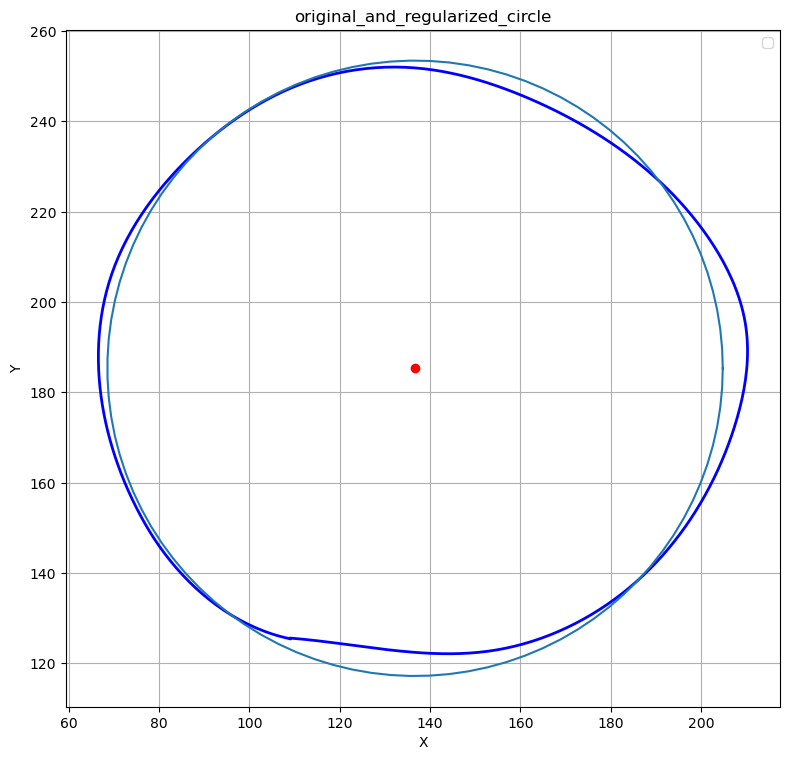

In [54]:
plot_original_and_regularized_circle(isolation_polylines, 0)

#### Best Fit for Ellipse

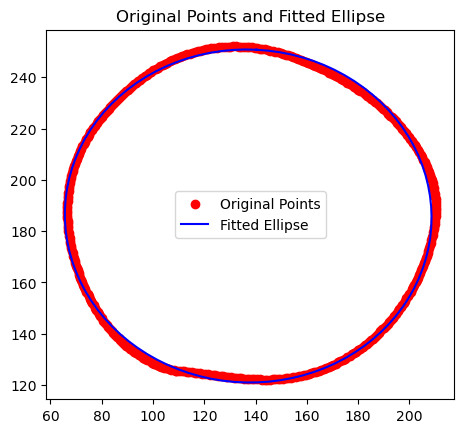

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def fit_and_plot_ellipse(points):
    # Convert the list of points to a numpy array
    points = np.array(points, dtype=np.float32)
    
    # Fit an ellipse to the points
    ellipse = cv2.fitEllipse(points)
    
    # Extract ellipse parameters
    center, axes, angle = ellipse
    major_axis, minor_axis = axes
    
    # Create points along the ellipse
    theta = np.linspace(0, 2 * np.pi, 100)
    ellipse_points = np.array([
        center[0] + major_axis / 2 * np.cos(theta) * np.cos(np.radians(angle)) - minor_axis / 2 * np.sin(theta) * np.sin(np.radians(angle)),
        center[1] + major_axis / 2 * np.cos(theta) * np.sin(np.radians(angle)) + minor_axis / 2 * np.sin(theta) * np.cos(np.radians(angle))
    ]).T

    # Plot the original points
    plt.scatter(points[:, 0], points[:, 1], color='red', label='Original Points')
    
    # Plot the fitted ellipse
    plt.plot(ellipse_points[:, 0], ellipse_points[:, 1], color='blue', label='Fitted Ellipse')
    
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.title('Original Points and Fitted Ellipse')
    plt.show()

# Example usage
points = isolation_polylines[0][0]
fit_and_plot_ellipse(points)

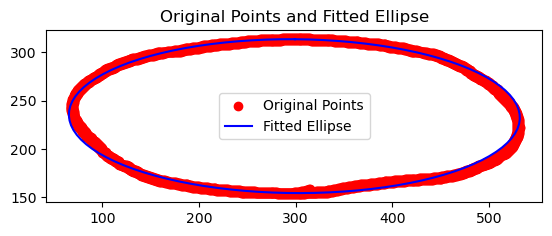

In [57]:
ellipse_csv = r"C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\ellipse1.csv"
ellipse = read_csv(ellipse_csv)[0][0]

fit_and_plot_ellipse(ellipse)

#### Fit best Rectangles

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def fit_and_plot_rectangle(points):
    # Convert the list of points to a numpy array
    points = np.array(points, dtype=np.float32)
    
    # Fit a rotated rectangle to the points
    rect = cv2.minAreaRect(points)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    
    # Create a plot
    plt.figure(figsize=(8, 8))
    
    # Plot the original points
    plt.scatter(points[:, 0], points[:, 1], color='red', label='Original Points')
    
    # Plot the fitted rectangle
    plt.plot(np.append(box[:, 0], box[0, 0]), np.append(box[:, 1], box[0, 1]), color='blue', label='Fitted Rectangle')
    
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.title('Original Points and Fitted Rectangle')
    plt.show()

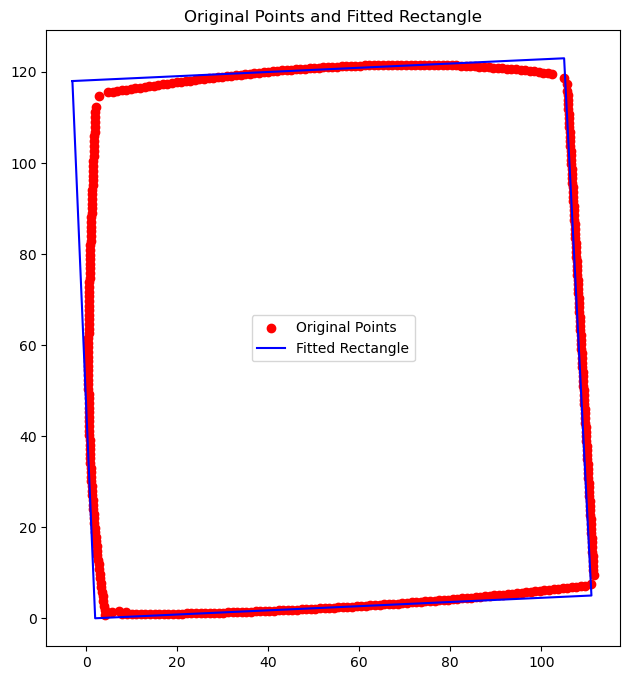

In [59]:
# Example usage
rectangle = isolation_polylines[2][0]  # Replace with your list of points
fit_and_plot_rectangle(rectangle)

#### Fit regular polygons

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

def plot_convex_hull(points):
    # Convert points to a numpy array
    points = np.array(points)
    
    # Compute the convex hull
    hull = ConvexHull(points)
    hull_points = points[hull.vertices]
    
    # Plot the original points
    plt.figure(figsize=(8, 8))
    plt.scatter(points[:, 0], points[:, 1], color='red', s=10, label='Original Points')
    
    # Plot the convex hull
    plt.plot(np.append(hull_points[:, 0], hull_points[0, 0]), np.append(hull_points[:, 1], hull_points[0, 1]), color='blue', linestyle='-', label='Convex Hull')
    
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.title('Original Points and Convex Hull')
    plt.show()

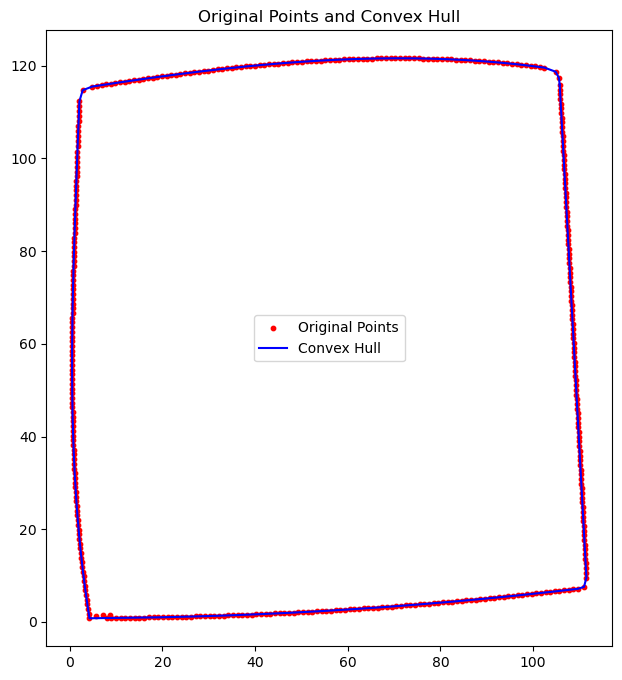

In [86]:
polygon = isolation_polylines[2][0]  # Replace with your list of points
plot_convex_hull(polygon)  # Change num_sides as needed

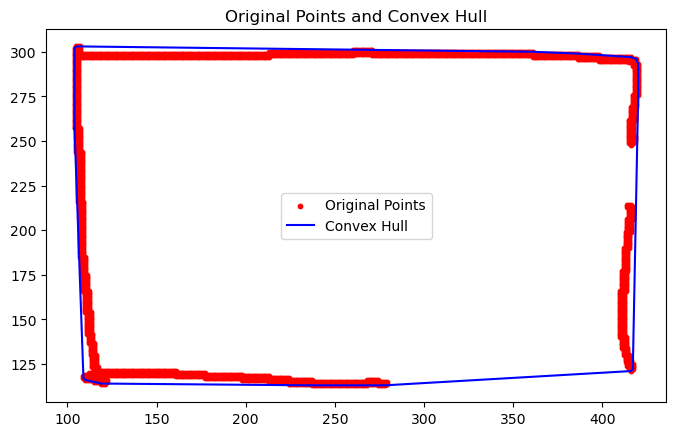

In [87]:
incomplete_rectangle_path = r"C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\incomplete_rectangle.csv"
incomplete_rectangle = read_csv(incomplete_rectangle_path)[0][0]  # Replace with your list of points
plot_convex_hull(incomplete_rectangle)

### Hough Transform on images

#### Lines

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


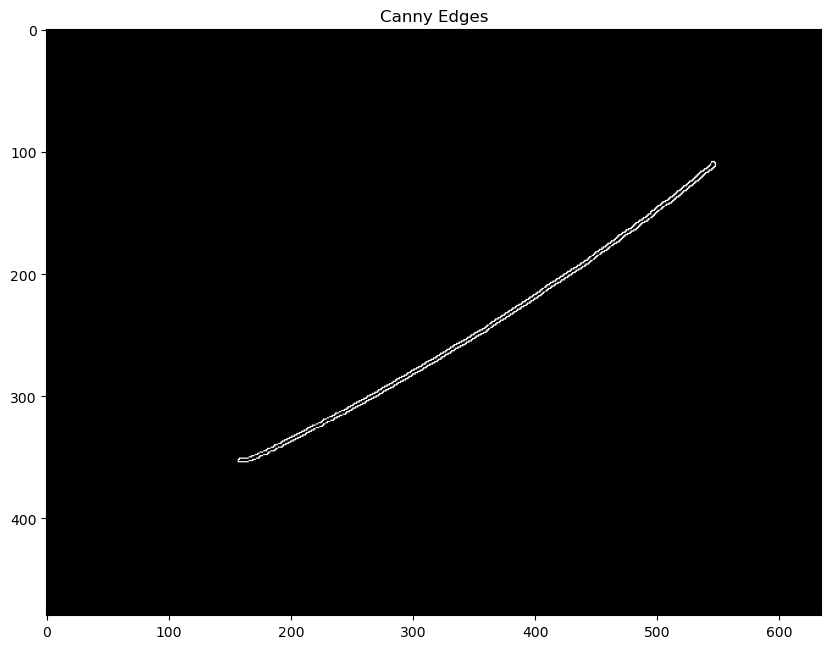

[[[403.           0.9773844 ]]

 [[392.           1.0471976 ]]

 [[394.           1.0297443 ]]

 [[399.           0.99483764]]

 [[417.           0.9250245 ]]

 [[397.           1.012291  ]]

 [[407.           0.9599311 ]]

 [[412.           0.94247776]]

 [[389.           1.0821041 ]]

 [[406.           0.9773844 ]]

 [[390.           1.0646509 ]]

 [[388.           1.0995574 ]]

 [[395.           1.0471976 ]]

 [[393.           1.0646509 ]]

 [[392.           1.0821041 ]]

 [[402.           0.99483764]]

 [[420.           0.9250245 ]]

 [[410.           0.9599311 ]]]


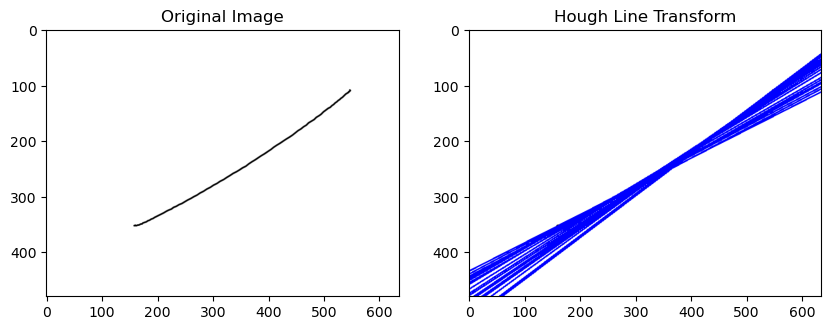

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image_path = r"C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\line1.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Edge detection using Canny
edges = cv2.Canny(image, 50, 150, apertureSize=3)
print(edges)

# Display edges to verify
plt.figure(figsize=(10, 10))
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.show()

# Hough Line Transform
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)
print(lines)

# Create a copy of the original image to draw lines
line_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Draw the detected lines on the image
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = int(a * rho)
        y0 = int(b * rho)
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the original and result images
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(line_image), plt.title('Hough Line Transform')
plt.show()


Number of lines detected: 18
Best fit line: y = -0.62x + 470.47


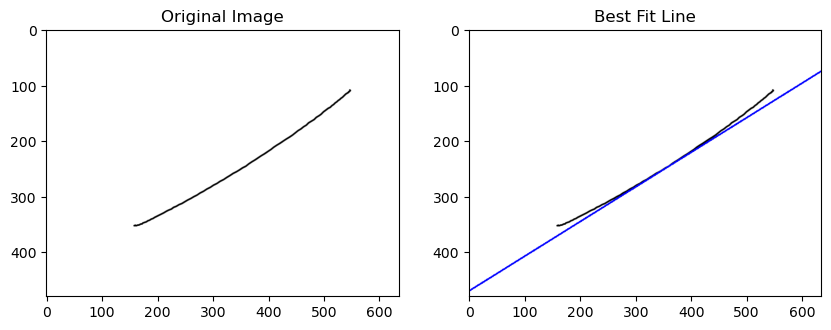

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Edge detection using Canny
edges = cv2.Canny(image, 50, 150, apertureSize=3)

# Detect lines using Hough Line Transform
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)

if lines is not None:
    print(f"Number of lines detected: {len(lines)}")
    
    # Collect points from all detected lines
    points = []
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = int(a * rho)
        y0 = int(b * rho)
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        points.extend([(x1, y1), (x2, y2)])
    
    points = np.array(points)
    
    # Fit a line using Least Squares method
    def fit_line(points):
        x = points[:, 0]
        y = points[:, 1]
        A = np.vstack([x, np.ones(len(x))]).T
        m, c = np.linalg.lstsq(A, y, rcond=None)[0]
        return m, c

    # Get the best fit line
    m, c = fit_line(points)
    print(f"Best fit line: y = {m:.2f}x + {c:.2f}")

    # Create a copy of the original image to draw the best fit line
    line_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    
    # Draw the best fit line
    x1, y1 = 0, int(c)
    x2, y2 = image.shape[1], int(m * image.shape[1] + c)
    cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 2)
    
    # Display the original and result images
    plt.figure(figsize=(10, 10))
    plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
    plt.subplot(122), plt.imshow(line_image), plt.title('Best Fit Line')
    plt.show()
else:
    print("No lines detected")


Number of line segments detected: 4
Best fit line: y = -0.65x + 476.75


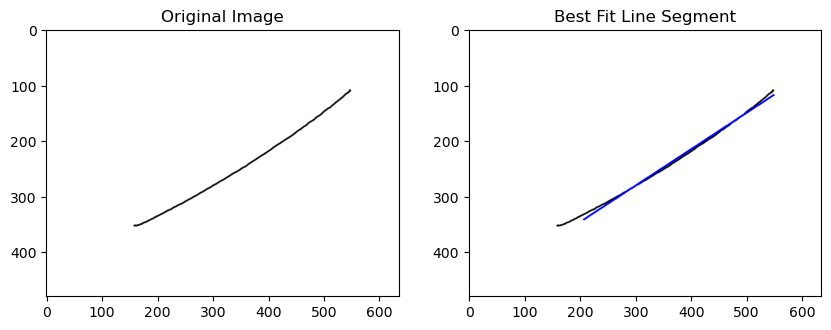

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Edge detection using Canny
edges = cv2.Canny(image, 50, 150, apertureSize=3)

# Probabilistic Hough Line Transform
linesP = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=80, maxLineGap=50)

if linesP is not None:
    print(f"Number of line segments detected: {len(linesP)}")
    
    # Collect endpoints from all detected line segments
    points = []
    for line in linesP:
        x1, y1, x2, y2 = line[0]
        points.extend([(x1, y1), (x2, y2)])
    
    points = np.array(points)
    
    # Fit a line using Least Squares method
    def fit_line(points):
        x = points[:, 0]
        y = points[:, 1]
        A = np.vstack([x, np.ones(len(x))]).T
        m, c = np.linalg.lstsq(A, y, rcond=None)[0]
        return m, c

    # Get the best fit line
    m, c = fit_line(points)
    print(f"Best fit line: y = {m:.2f}x + {c:.2f}")

    # Create a copy of the original image to draw the best fit line segment
    line_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    
    # Calculate the segment endpoints based on the detected points
    x_min, x_max = np.min(points[:, 0]), np.max(points[:, 0])
    y_min, y_max = np.min(points[:, 1]), np.max(points[:, 1])
    
    x1, y1 = x_min, int(m * x_min + c)
    x2, y2 = x_max, int(m * x_max + c)
    
    # Draw the best fit line segment
    cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 2)
    
    # Display the original and result images
    plt.figure(figsize=(10, 10))
    plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
    plt.subplot(122), plt.imshow(line_image), plt.title('Best Fit Line Segment')
    plt.show()
else:
    print("No line segments detected")

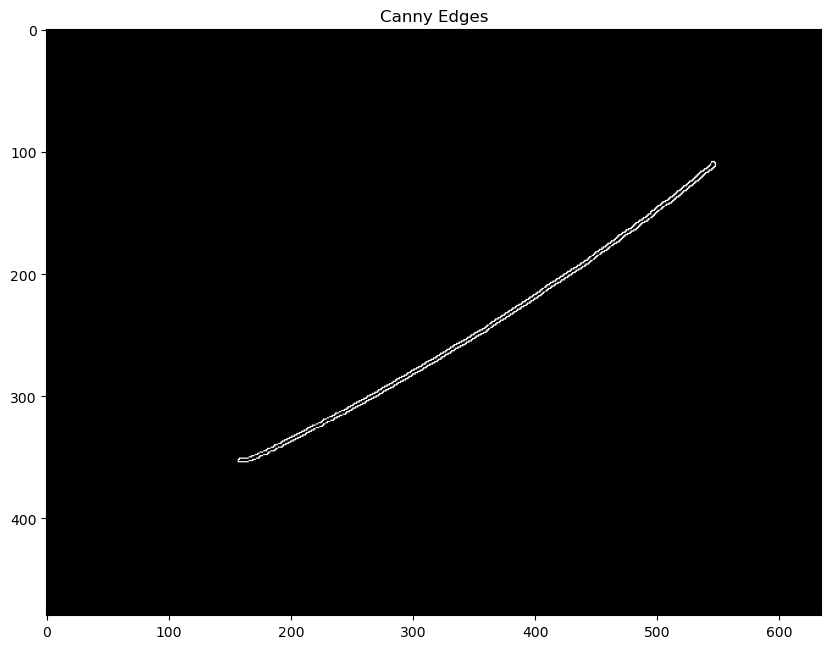

Number of lines detected: 18
Best fit line: y = -0.62x + 470.47
Segment endpoints: (278, 301), (293, 283)


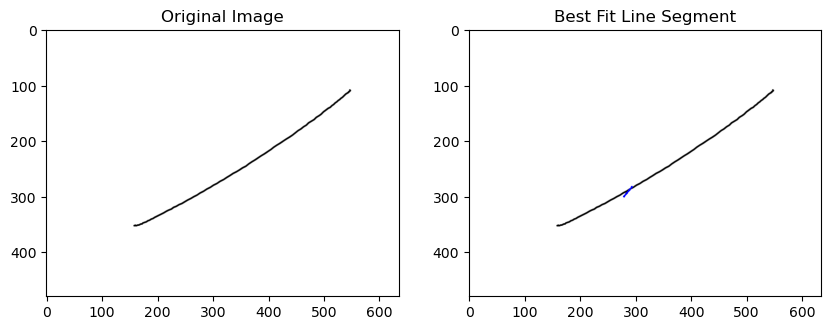

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Edge detection using Canny
edges = cv2.Canny(image, 50, 150, apertureSize=3)

# Display edges to verify
plt.figure(figsize=(10, 10))
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.show()

# Detect lines using Hough Line Transform
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)

if lines is not None:
    print(f"Number of lines detected: {len(lines)}")
    
    # Collect points from all detected lines
    points = []
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = int(a * rho)
        y0 = int(b * rho)
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        points.extend([(x1, y1), (x2, y2)])
    
    points = np.array(points)
    
    # Fit a line using Least Squares method
    def fit_line(points):
        x = points[:, 0]
        y = points[:, 1]
        A = np.vstack([x, np.ones(len(x))]).T
        m, c = np.linalg.lstsq(A, y, rcond=None)[0]
        return m, c

    # Get the best fit line
    m, c = fit_line(points)
    print(f"Best fit line: y = {m:.2f}x + {c:.2f}")

    # Find the endpoints of the detected edges that are closest to the best fit line
    edge_points = np.column_stack(np.nonzero(edges))

    def distance_to_line(point, m, c):
        x, y = point
        return abs(m*x - y + c) / np.sqrt(m**2 + 1)

    distances = [distance_to_line(p, m, c) for p in edge_points]
    sorted_indices = np.argsort(distances)
    
    # Get two endpoints that are farthest apart among the closest points to the line
    closest_points = edge_points[sorted_indices[:50]]  # Adjust number if needed
    x = closest_points[:, 0]
    y = closest_points[:, 1]
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]

    distances = [np.linalg.norm(p1 - p2) for p1 in closest_points for p2 in closest_points]
    idx1, idx2 = np.unravel_index(np.argmax(distances), (len(closest_points), len(closest_points)))

    endpoint1 = tuple(closest_points[idx1])
    endpoint2 = tuple(closest_points[idx2])
    
    print(f"Segment endpoints: {endpoint1}, {endpoint2}")

    # Create a copy of the original image to draw the best fit segment
    line_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    
    # Draw the best fit line segment
    cv2.line(line_image, endpoint1, endpoint2, (0, 0, 255), 2)
    
    # Display the original and result images
    plt.figure(figsize=(10, 10))
    plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
    plt.subplot(122), plt.imshow(line_image), plt.title('Best Fit Line Segment')
    plt.show()
else:
    print("No lines detected")

#### Circles

Number of circles detected: 13
Best fit circle: center=(325.61, 232.86), radius=39.89


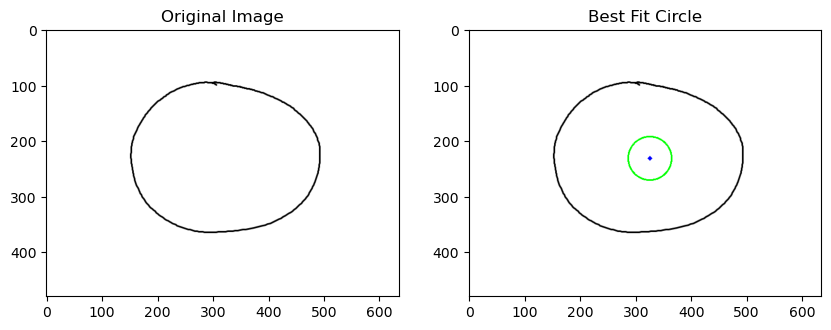

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

# Load an image
image_circle = r"C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\circle1.png"
image = cv2.imread(image_circle, cv2.IMREAD_GRAYSCALE)

# Blur the image to reduce noise
blurred_image = cv2.medianBlur(image, 5)

# Detect circles using Hough Circle Transform
circles = cv2.HoughCircles(blurred_image, cv2.HOUGH_GRADIENT, dp=1, minDist=20,
                           param1=50, param2=30, minRadius=50, maxRadius=0)

if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    print(f"Number of circles detected: {len(circles)}")

    # Extract the centers and radii
    centers = circles[:, :2]
    radii = circles[:, 2]
    
    # Function to calculate the geometric distance from points to a circle
    def calc_R(xc, yc, x, y):
        return np.sqrt((x - xc)**2 + (y - yc)**2)

    # Objective function to minimize
    def objective(params, x, y):
        xc, yc, r = params
        Ri = calc_R(xc, yc, x, y)
        return Ri - r
    
    # Initial guess for the circle parameters
    x_m = np.mean(centers[:, 0])
    y_m = np.mean(centers[:, 1])
    r_m = np.mean(radii)
    initial_guess = [x_m, y_m, r_m]
    
    # Apply least squares to find the best fit circle
    result = least_squares(objective, initial_guess, args=(centers[:, 0], centers[:, 1]))
    xc, yc, r = result.x
    print(f"Best fit circle: center=({xc:.2f}, {yc:.2f}), radius={r:.2f}")

    # Create a copy of the original image to draw the best fit circle
    circle_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    
    # Draw the best fit circle
    cv2.circle(circle_image, (int(xc), int(yc)), int(r), (0, 255, 0), 2)
    cv2.circle(circle_image, (int(xc), int(yc)), 2, (0, 0, 255), 3)  # Draw the center of the circle
    
    # Display the original and result images
    plt.figure(figsize=(10, 10))
    plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
    plt.subplot(122), plt.imshow(circle_image), plt.title('Best Fit Circle')
    plt.show()
else:
    print("No circles detected")